In [1]:
import xarray as xr
import numpy as np
import glob

import matplotlib.pyplot as plt
from scipy.stats import linregress

from utils import *


mpl_settings()
paper_plot()

# load data

In [2]:
cmip_85 = glob.glob(r'./inputs/future_rcp85/*.nc')
cmip_45 = glob.glob(r'./inputs/future_rcp45/*.nc')

# load files
masterlist = []
for file in cmip_85[:]:
    # get model names
    nn = file.split('\\')[-1].split('_')[1]
    print(f'doing {nn}',end='\r')

    
    # open cmip5 file
    masterlist.append(xr.open_dataarray(file))

ds85 = xr.concat(masterlist,dim='model')

# load cmip45 files
masterlist = []
for file in cmip_45[:]:
    # get model names
    nn = file.split('\\')[-1].split('_')[1]
    print(f'doing {nn}',end='\r')

    
    # open cmip5 file
    masterlist.append(xr.open_dataarray(file))

ds45 = xr.concat(masterlist,dim='model')

# Fig S6

In [3]:
mon85 = ds85.mean(dim='model').resample(Time='MS').mean()
mon45 = ds45.mean(dim='model').resample(Time='MS').mean()
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Okt','Nov','Dez']
month_idx = mon85.groupby('Time.month').groups

c1,c2 = '#1b9e77','#d95f02'

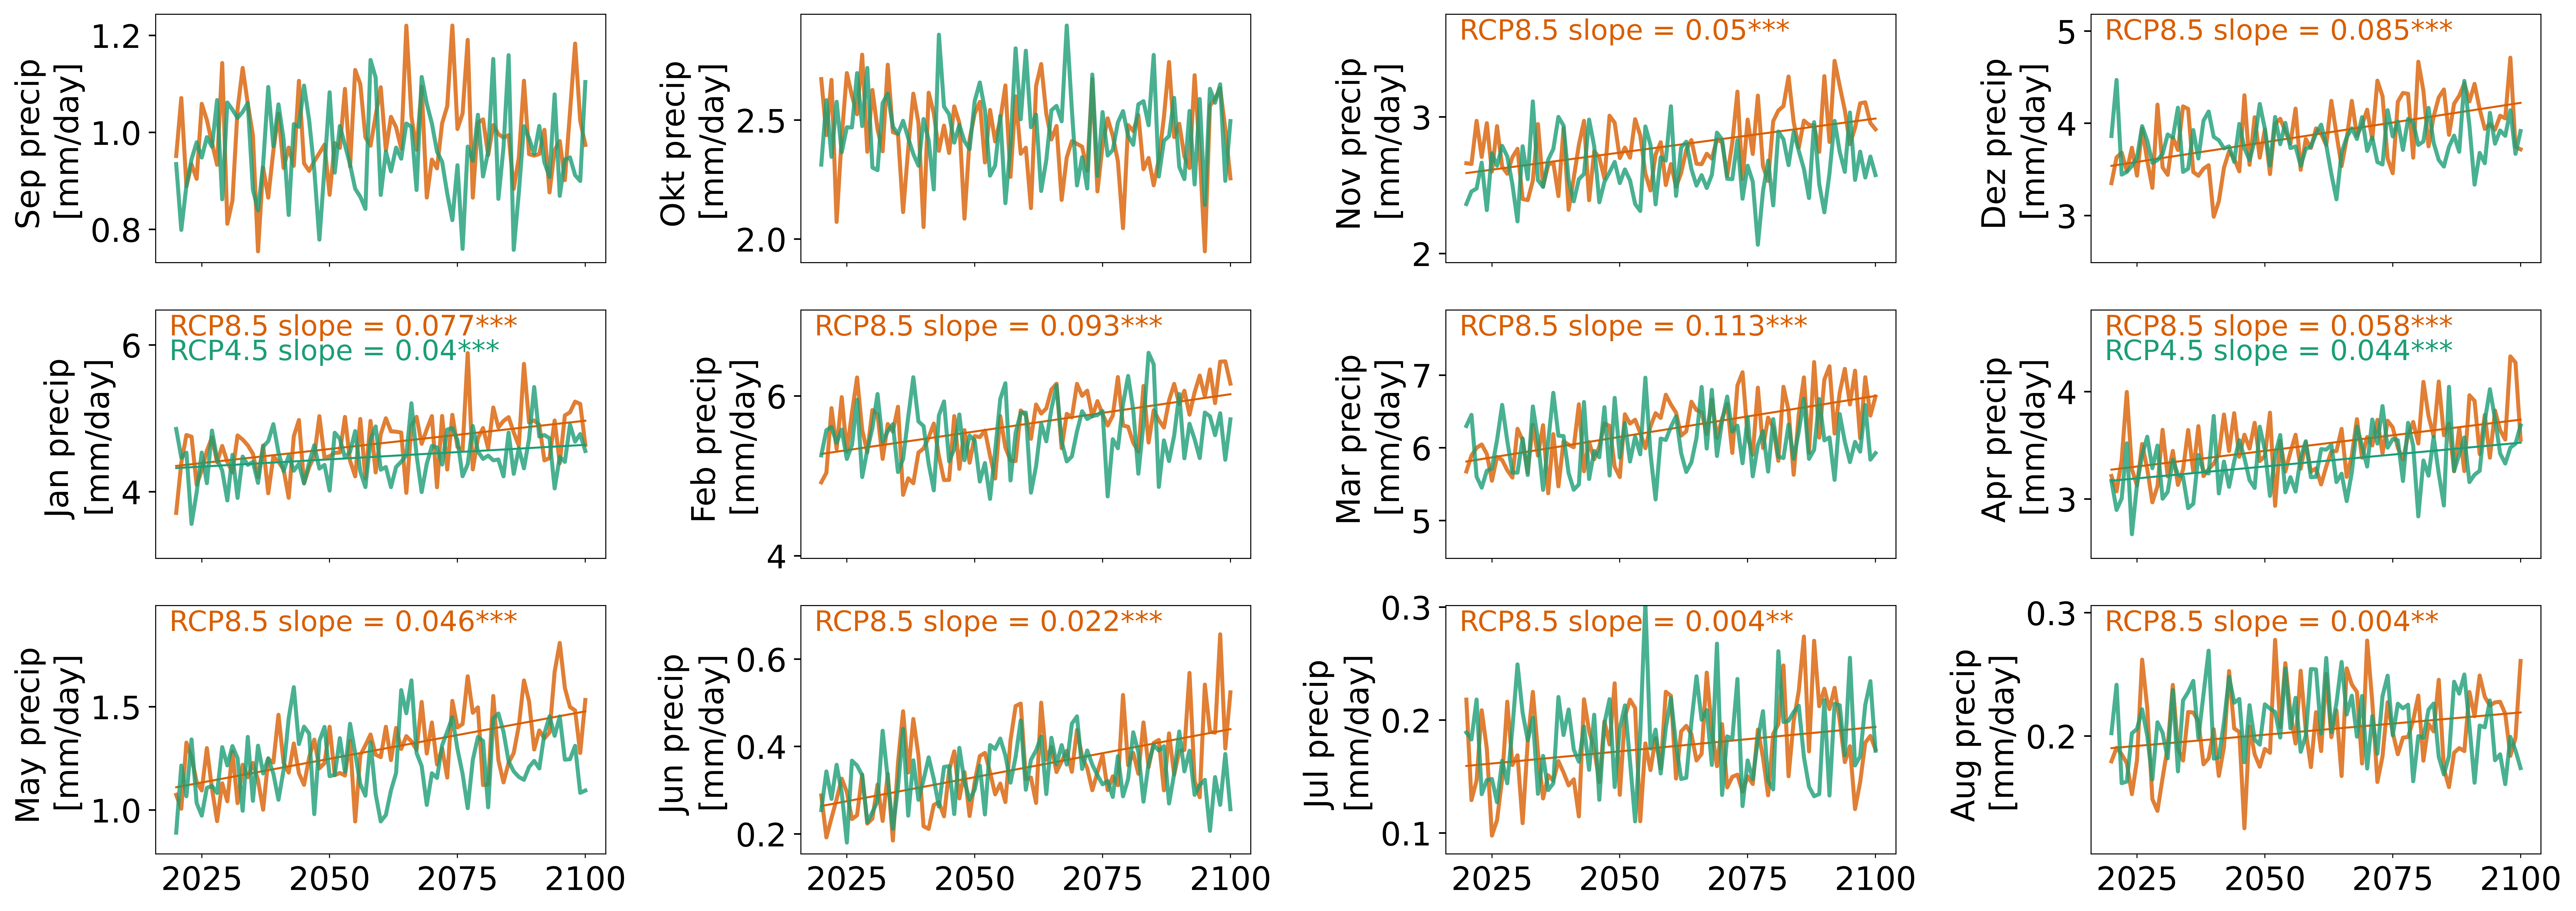

In [4]:
### Monthly precip trends
fig, axs = plt.subplots(3,4,figsize=(18,6.5),dpi=600,sharex=True)
axs = axs.ravel()
for i,m in enumerate([9,10,11,12,1,2,3,4,5,6,7,8]):
    x = np.arange(2020,2020+len(mon85.isel(Time=month_idx[m]).Time.values))
    for data,col in zip([mon85,mon45],[c2,c1]):
        y = data.isel(Time=month_idx[m]).values
        slope, intercept, _, p, _ = linregress(x,y)
        axs[i].plot(x,y,c=col,alpha=.8)
        
        if p < 0.05:
            axs[i].plot(x,slope*x + intercept,'-',linewidth=1,c=col)
            if p < 0.01:
                nstars = 3*'*'
            elif p < 0.05:            
                nstars = 2*'*'
            else:
                nstars = '*'
            label = f'slope = {np.round(slope*10,3)}{nstars}'
            if col == c1:
                axs[i].text(0.03, .83,'RCP4.5 ' + label,color=col,ha='left',va='center',transform = axs[i].transAxes);
            elif col == c2:
                axs[i].text(0.03, .93,'RCP8.5 ' + label,color=col,ha='left',va='center',transform = axs[i].transAxes);

                low_ylim = y.min() - y.min()/6
                hi_ylim = y.max() + y.max()/10
                axs[i].set_ylim(low_ylim,hi_ylim)
        
    axs[i].set_ylabel(f'{months[m-1][:3]} precip \n[mm/day]')
   
    
fig.subplots_adjust(hspace=0.05,wspace=.4)
fig.tight_layout()


# For the paper, I additionally aligned the y-labels in a vector manipulation program.
plt.savefig('./figures/FigS6.svg',bbox_inches='tight')
#plt.savefig('./figures/FigS6.pdf',bbox_inches='tight')